# Random Forest

In [1]:
import csv
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
# from sklearn.preprocessing import StandardScaler
# from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, mean_squared_error, plot_roc_curve
import matplotlib.pyplot as plt
%matplotlib inline

# Needed for decision tree visualization
import pydotplus
from IPython.display import Image


## Loading Data

In [34]:
# replace filepath when changing the file ot the final directory
filepath = "resources/"
# filepath = "Personal_Loan_Classification_Model/source code/resources/"

# Loading scaled data
X_train_scaled = np.loadtxt(filepath + 'X_train_scaled.csv', delimiter=',')
X_test_scaled = np.loadtxt(filepath + 'X_test_scaled.csv', delimiter=',')

# Import SMOTE & Random Over Sampled data
# To import the X_train_smote, X_train_ros
X_train_smote = np.loadtxt(filepath + 'X_train_smote.csv', delimiter=',')
X_train_ros = np.loadtxt(filepath + 'X_train_ros.csv', delimiter=',')

# Import SMOTE & Random Over Sampled dataset Traget
# To import y_train_smote, y_train_ros
y_train_smote = pd.read_csv(filepath + 'y_train_smote.csv', sep=',', header=0, squeeze=True)
y_train_ros = pd.read_csv(filepath + 'y_train_ros.csv', sep=',', header=0, squeeze=True)

# Import raw target dataset
# To import y_train, y_test
y_train = pd.read_csv(filepath + 'y_train.csv', sep=',', header=0, squeeze=True, index_col=0)
y_test = pd.read_csv(filepath + 'y_test.csv', sep=',', header=0, squeeze=True, index_col=0)

# Importing feature headers
features = pd.read_csv(filepath + 'features.csv').drop(columns='Unnamed: 0')



---


## Fitting the Random Forest Model with scaled data

In [122]:
# Create a random forest classifier

# We tested the model qith different number of estimatos to see the difference in accuracy:
# With 500 estimators Acc 0.9864
# With 1000 estimators Acc 0.985
# With 2000 estimators Acc 0.9864
# With 3000 estimators Acc 0.9872
# With 5000 estimators Acc 0.9872
# With 10000 estimators Acc 0.9872
# For this excercise we will use 500 and a random_state of 78 to make the outcome consistent across calls

rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

In [123]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

#### Making Predictions Using the Decsion Tree Model

In [124]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

#### Model Evaluation

In [125]:
# Calculating the confusion matrix

cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [130]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,1120,10
Actual 1,8,112


Accuracy Score : 0.9856
Classification Report
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1130
           1       0.92      0.93      0.93       120

    accuracy                           0.99      1250
   macro avg       0.96      0.96      0.96      1250
weighted avg       0.99      0.99      0.99      1250



#### Feature Importance

In [131]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_

In [132]:
# Sorting the features by their importance
sorted(zip(rf_model.feature_importances_, features), reverse=True)

[(0.4958851269316489, 'Income'),
 (0.18875928444550827, 'CCAvg'),
 (0.1435696251508195, 'Education'),
 (0.08088188804647682, 'Family'),
 (0.033841536085228, 'CD Account'),
 (0.022972065782189986, 'Mortgage'),
 (0.021673956524115818, 'Age'),
 (0.005121814981202384, 'Online'),
 (0.004638720496083981, 'CreditCard'),
 (0.0026559815567262592, 'Securities Account')]

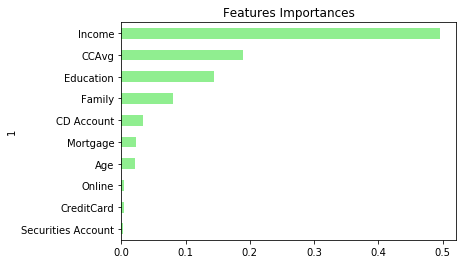

In [133]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, features), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)

#### MSE

In [134]:
mean_squared_error(y_test, predictions)

0.0144

#### ROC curve

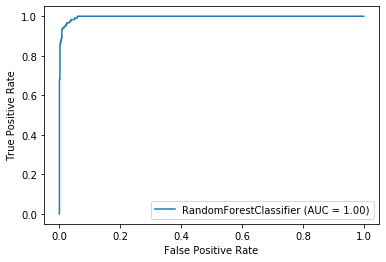

In [151]:
svc_disp = plot_roc_curve(rf_model, X_test_scaled, y_test)
plt.show()

---


## Fitting the Random Forest Model with SMOTE data

In [136]:
# Fitting the model
rf_model = rf_model.fit(X_train_smote, y_train_smote)
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)
# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,1120,10
Actual 1,8,112


Accuracy Score : 0.9856
Classification Report
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1130
           1       0.92      0.93      0.93       120

    accuracy                           0.99      1250
   macro avg       0.96      0.96      0.96      1250
weighted avg       0.99      0.99      0.99      1250



#### Feature Importance SMOTE

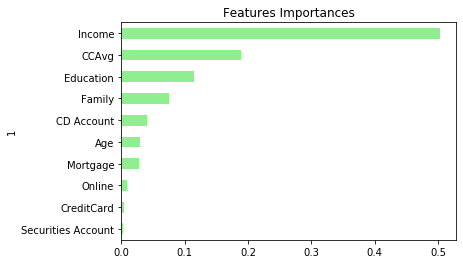

In [154]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# Sorting the features by their importance
sorted(zip(rf_model.feature_importances_, features), reverse=True)
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, features), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)

#### MSE SMOTE

In [155]:
mean_squared_error(y_test, predictions)

0.016

#### ROC curve SMOTE

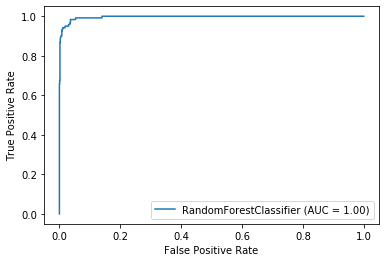

In [156]:
svc_disp = plot_roc_curve(rf_model, X_test_scaled, y_test)
plt.show()

---


## Fitting the Random Forest Model with ROC data

In [157]:
# Fitting the model
rf_model = rf_model.fit(X_train_ros, y_train_ros)
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)
# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,1121,9
Actual 1,11,109


Accuracy Score : 0.984
Classification Report
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1130
           1       0.92      0.91      0.92       120

    accuracy                           0.98      1250
   macro avg       0.96      0.95      0.95      1250
weighted avg       0.98      0.98      0.98      1250



#### Feature Importance ROC

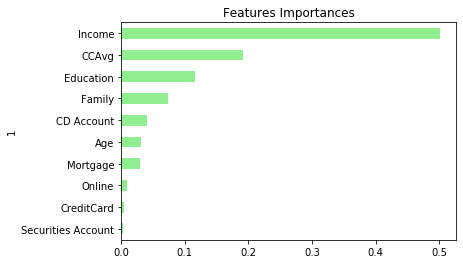

In [158]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# Sorting the features by their importance
sorted(zip(rf_model.feature_importances_, features), reverse=True)
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, features), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)

#### MSE ROC

In [159]:
mean_squared_error(y_test, predictions)

0.016

#### ROC curve SMOTE

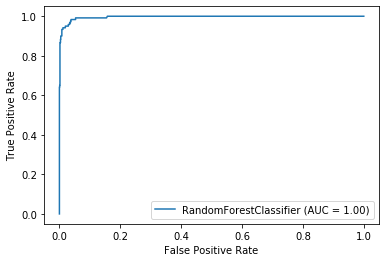

In [160]:
svc_disp = plot_roc_curve(rf_model, X_test_scaled, y_test)
plt.show()